##### About the dataset
1. id: unique id for news article
     
2. title: the title of news article

3. author: author of the news article

4. text: text of the article could be incomplete

5. label: a label that marks a news is real or fake

#### 1:Fake news
#### 0:Real news

# importing the dependencies

In [24]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [25]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\Shashi
[nltk_data]     Shekhar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
print(stopwords.words("english"))#getting the english language stopwords

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#### Data Pre-Processing

In [27]:
data=pd.read_csv(r"C:\Users\Shashi Shekhar\Desktop\python\Dataset for resume projects\fake-news\train.csv")

In [28]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [29]:
data.shape

(20800, 5)

In [30]:
#count of null datas in dataset as
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [31]:
# replaciing the null values with the empty string
data.fillna("", inplace=True)

In [32]:
data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [33]:
# merging the author name and title
data["content"]=data["title"]+" "+data["author"]

In [34]:
data.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [35]:
#separating the label and data
X=data.drop(columns="label", axis=1)
Y=data["label"]

In [36]:
print(X.shape, Y.shape)

(20800, 5) (20800,)


#### Stemming: process to reduce a words to rootwords

In [37]:
# Initialize the PorterStemmer
port_stem = PorterStemmer()

def stemming(content):
    # Remove non-alphabetic characters
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    
    # Convert to lowercase
    stemmed_content = stemmed_content.lower()
    
    # Split into words
    stemmed_content = stemmed_content.split()
    
    # Remove stopwords and stem the remaining words
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if word not in stopwords.words('english')]
    
    # Join the words back into a single string
    stemmed_content = ' '.join(stemmed_content)
    
    return stemmed_content

In [41]:
data["content"]=data["content"].apply(stemming)

In [42]:
print(data["content"])

0        hous dem aid even see comey letter jason chaff...
1        flynn hillari clinton big woman campu breitbar...
2                   truth might get fire consortiumnew com
3        civilian kill singl us airstrik identifi jessi...
4        iranian woman jail fiction unpublish stori wom...
                               ...                        
20795    rapper trump poster child white supremaci jero...
20796    n f l playoff schedul matchup odd new york tim...
20797    maci said receiv takeov approach hudson bay ne...
20798    nato russia hold parallel exercis balkan alex ...
20799                            keep f aliv david swanson
Name: content, Length: 20800, dtype: object


In [44]:
data

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,hous dem aid even see comey letter jason chaff...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,flynn hillari clinton big woman campu breitbar...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,truth might get fire consortiumnew com
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,civilian kill singl us airstrik identifi jessi...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,iranian woman jail fiction unpublish stori wom...
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,rapper trump poster child white supremaci jero...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,n f l playoff schedul matchup odd new york tim...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,maci said receiv takeov approach hudson bay ne...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,nato russia hold parallel exercis balkan alex ...


In [45]:
# seperating the data and label
X=data["content"].values
Y=data["label"].values

In [46]:
X

array(['hous dem aid even see comey letter jason chaffetz tweet darrel lucu',
       'flynn hillari clinton big woman campu breitbart daniel j flynn',
       'truth might get fire consortiumnew com', ...,
       'maci said receiv takeov approach hudson bay new york time michael j de la merc rachel abram',
       'nato russia hold parallel exercis balkan alex ansari',
       'keep f aliv david swanson'], dtype=object)

In [47]:
Y

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [48]:
# converting the textual data to numerical data
vectorizer=TfidfVectorizer()
vectorizer.fit(X)

X=vectorizer.transform(X)

In [50]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

#### spliting the dataset into training and test dataset

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(16640, 17128) (4160, 17128) (16640,) (4160,)


#### training the model by using logistic regession model

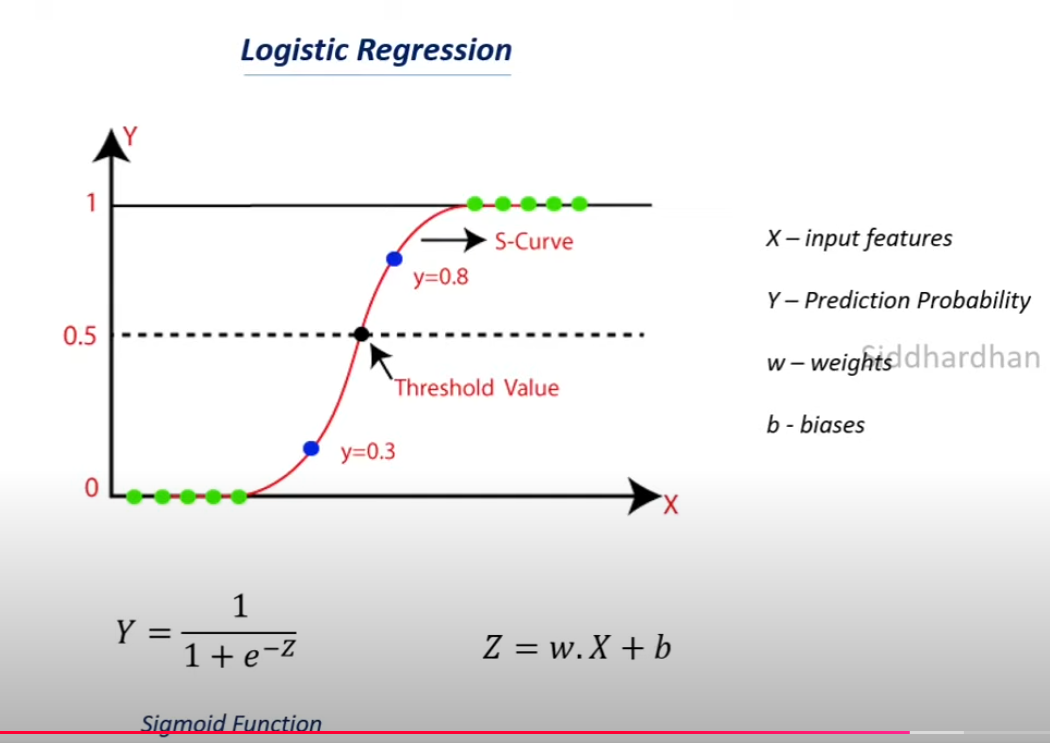

In [52]:
model=LogisticRegression()

In [53]:
model.fit(X_train, Y_train)

LogisticRegression()

## Evaluation by using accuracy score

In [54]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction, Y_train)


In [55]:
print("Accuracy score of training data : ", training_data_accuracy)

Accuracy score of training data :  0.9863581730769231


In [56]:
#accuracy on the test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction, Y_test)
print("Accuracy score of test data : ", test_data_accuracy)

Accuracy score of test data :  0.9790865384615385


In [62]:
X_new=X_test[4]
prediction=model.predict(X_new)
print(prediction)

if (prediction[0]==0):
    print("The News is real.")
else:
    print("The News is fake")

[0]
The News is real.


In [61]:
print(Y_test[4])

0
